In [1]:
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

"""Data import and variable setting"""
#importing forex time series from 2016-03-11 to 2019-03-11, can download data of other time periods later
file = pd.read_csv('exchange.csv', parse_dates=['Results'], index_col='Results')

#setup plotly API
plotly.tools.set_credentials_file(username='kenli95', api_key='qmaF1wnHyzZbIymAAALf')
plotly.tools.set_config_file(world_readable=True, sharing='public')

#splits the summary part of the file from the actual timeseries data
summary = file[0:5].copy()
data = file[6:].copy()
print(data.columns)
#converts obj columns to floats
data[('EUR/USD Close')] = data['EUR/USD Close'].astype(float)
data[('EUR/USD High')] = data['EUR/USD High'].astype(float)
data[('EUR/USD Low')] = data['EUR/USD Low'].astype(float)

dates = list(data.index) #currently not used


#Split data by seasons: spring:Mar1-May31; summer:Jun1-Aug31; fall:Sept1-Nov30; winter:Dec1-Feb28
spring2016 = data['2016-03-11':'2016-05-31']
summer2016 = data['2016-06-01':'2016-08-31']
fall2016 = data['2016-09-01':'2016-11-30']
winter2016 = data['2016-12-01':'2016-02-28']
'''

'\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport matplotlib.ticker as mticker\nimport plotly\nimport plotly.plotly as py\nimport plotly.graph_objs as go\n\n"""Data import and variable setting"""\n#importing forex time series from 2016-03-11 to 2019-03-11, can download data of other time periods later\nfile = pd.read_csv(\'exchange.csv\', parse_dates=[\'Results\'], index_col=\'Results\')\n\n#setup plotly API\nplotly.tools.set_credentials_file(username=\'kenli95\', api_key=\'qmaF1wnHyzZbIymAAALf\')\nplotly.tools.set_config_file(world_readable=True, sharing=\'public\')\n\n#splits the summary part of the file from the actual timeseries data\nsummary = file[0:5].copy()\ndata = file[6:].copy()\nprint(data.columns)\n#converts obj columns to floats\ndata[(\'EUR/USD Close\')] = data[\'EUR/USD Close\'].astype(float)\ndata[(\'EUR/USD High\')] = data[\'EUR/USD High\'].astype(float)\ndata[(\'EUR/USD Low\')] = data[\'EUR/USD Low\'].astype(float)\n\ndates = list(dat

In [2]:
'''Select useful data from large file'''
#file = pd.read_csv('USDCAD.txt', sep=',', low_memory=False, parse_dates=['<DTYYYYMMDD>'], index_col='<DTYYYYMMDD>')
#data = file['2018-01-01':'2019-01-01']
#print(data.info())
#useful = ['<TIME>','<OPEN>','<HIGH>','<LOW>','<CLOSE>']
#use_data = data[useful]
#print(use_data.info())

'Select useful data from large file'

In [ ]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns

In [22]:

"""Data import and variable setting"""
'''importing forex time series from 2016-03-11 to 2019-03-11, can download data of other time periods later'''

#config:
currency = 'USD/CAD'
frequency = 'MINUTE' #'HOUR', 'MINUTE'

'''Forex hours are SUNDAY 5PM EST to FRIDAY 4PM EST'''
file2018 = pd.read_csv('USDCAD2018.txt', sep=',', low_memory=False) #, parse_dates=['<DTYYYYMMDD>'])
file2018['<TIME>'] = (file2018['<TIME>']/100).astype(int)
#file2018['<TIME>'] = pd.to_datetime(file2018['<TIME>'], format='%H%M')

file = file2018.set_index(['<DTYYYYMMDD>']).sort_index() #, '<TIME>'
file = file.rename(columns={'<TIME>':'TIME', '<OPEN>':'OPEN', '<HIGH>':'HIGH', '<LOW>':'LOW', '<CLOSE>':'CLOSE'})
file.index.names = ['DATE'] #, 'TIME'
data = file

#dates = list(data.index) #currently not used
#weeks = []



def select_date(date1, date2=0): #frequency: 'HOUR', 'MINUTE', 'DAY', 'MONTH' 
    global frequency
    assert type(date1) == str
    if date2 != 0:
        assert type(date2) == str
        data = file.loc[date1:date2]  #to create week(?) date2 = date1 + 6 
    else:
        data = file.loc[(date1)]
    if frequency == 'HOUR':
        data = data[data['TIME']%100==0]   
    else:
        return data

#split 2018 data into their months, some months begin on weekends so some days had to be skipped(market closes on weekends)
jan_data = select_date('2018-01-02', '2018-01-31')
feb_data = select_date('2018-02-01', '2018-02-28')
mar_data = select_date('2018-03-01', '2018-03-30')
apr_data = select_date('2018-04-01', '2018-04-30')
may_data = select_date('2018-05-01', '2018-05-31')
jun_data = select_date('2018-06-01', '2018-06-29')
jul_data = select_date('2018-07-01', '2018-07-31')
aug_data = select_date('2018-08-01', '2018-08-30')
sep_data = select_date('2018-09-02', '2018-09-30')
oct_data = select_date('2018-10-01', '2018-10-30')
nov_data = select_date('2018-11-01', '2018-11-30')
dec_data = select_date('2018-12-02', '2018-12-30')





In [23]:
#setup plotly API
plotly.tools.set_credentials_file(username='kenli95', api_key='qmaF1wnHyzZbIymAAALf')
plotly.tools.set_config_file(world_readable=True, sharing='public')


#print(fridays)
#sunday starts at 23:01, Friday stops at 20:50

class stats:
    global currency, data, dates, frequency
    
    def open_prices(df=data, currency=currency):
        assert type(currency) == str
        opens = df['OPEN']
        return opens
    
    def highs(df=data, currency=currency):
        assert type(currency) == str
        highs = df['HIGH']
        return highs

    def lows(df=data, currency=currency):
        assert type(currency) == str
        lows = df['LOW']
        return lows

    def closing_prices(df=data, currency=currency):
        assert type(currency) == str
        closes = df['CLOSE']
        return closes
    
    def extremes(mode='absolute'):
        highs = stats.highs()
        lows = stats.lows()
        closes = stats.closing_prices()
        if mode == 'absolute': #only works if this is the only case(conditionals not working)
            max_price = max(highs) 
            max_date = highs[highs==max(highs)]
            min_price = min(lows) 
            min_date = lows[lows==min(lows)]
        elif mode == 'lows':
            max_price = max(lows) 
            max_date = lows[lows==max(lows)]
            min_price = min(lows) 
            min_date = lows[lows==min(lows)]
        elif mode == 'highs':
            max_price = max(highs) 
            max_date = highs[highs==max(highs)]
            min_price = min(highs)
            min_date = highs[highs==min(highs)]
        elif mode == 'closing':
            max_price = max(closes) 
            max_date = closes[closes==max(closes)]
            min_price = min(closes) 
            min_date = closes[closes==min(closes)]
        else: raise Exception('No Such Mode')
        extreme_prices = [max_price, min_price]
        extreme_dates = [max_date, min_date]
        #print(extreme_prices, extreme_dates)
        return extreme_prices, extreme_dates #index 0 for prices only 
    
    def avg(date, span='day', price='CLOSE'): #check this
        if span == 'day':
            data = select_date(date)
            avg = statistics.mean(df[price])
            return avg
        elif span == 'hour':
            data = select_date(date)
            #hour_data = data[data['TIME']%100==0]
            print(data)
            #for hour in hour_data[price]:
                #hour_avg = statistics.mean(hour)
            #    print(hour)
        #elif mode == 'month'
        
    #def median_price(span='daily') #span = 'daily', 'weekly', 'monthly'
    #    if span ==
            

    #create functions for median and mode (daily, weekly, monthly)
    #create function for moving averages
    #create function for finding changes in price between two times
    #create function for finding max and min prices for the period
    #create function for finding trend between two times
    #create function for finding interquartile range

    
#stats.avg('2018-01-07', mode='hour')
print(data.index)

Index(['2018-01-02', '2018-01-02', '2018-01-02', '2018-01-02', '2018-01-02',
       '2018-01-02', '2018-01-02', '2018-01-02', '2018-01-02', '2018-01-02',
       ...
       '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
       '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01'],
      dtype='object', name='DATE', length=366983)


In [24]:

class graphs:
    global currency, data, dates, frequency
    
    def opens_graph(data):
        open_graph = stats.open_prices(data).plot(color='b', linewidth=0.5)
        plt.title('OPENING PRICES BY ' + frequency)
        plt.xlabel('TIME')
        plt.ylabel('PRICE' + '(' + currency + ')')
        
    
    def lows_graph(data):
        low_graph = stats.lows(data).plot(color='r', linewidth=0.5)
        plt.title('LOW PRICE POINTS BY ' + frequency)
        plt.xlabel('TIME')
        plt.ylabel('PRICE' + '(' + currency + ')')
        
    def highs_graph(data):
        high_graph = stats.highs(data).plot(color='g', linewidth=0.5)
        plt.title('HIGH PRICE POINTS BY ' + frequency)
        plt.xlabel('TIME')
        plt.ylabel('PRICE' + '(' + currency + ')')
    
    def closing_graph(data):
        stats.closing_prices(data).plot(color='y', linewidth=0.5)
        plt.title('CLOSING PRICES BY ' + frequency)
        plt.xlabel('TIME')
        plt.ylabel('PRICE' + '(' + currency + ')')
    
    def aggregate_graph(data): #this graph is ugly and hard to read
        a = stats.open_prices(data).plot(color='b', linewidth=0.3)
        b = stats.lows(data).plot(color='r', linewidth=0.3)
        c = stats.highs(data).plot(color='g', linewidth=0.3)
        d = stats.closing_prices(data).plot(color='y', linewidth=0.3)
        plt.title('PRICE POINTS BY ' + frequency)
        plt.legend()
        plt.xlabel('TIME')
        plt.ylabel('PRICE' + '(' + currency + ')')
        
    #def box_graph(data):
        
    #def cluster(data, date): 
        #sns.set()
        #sns.relplot(data.index)
        
    #def trend(): #month: use median of closing price of each day? year: use average of monthly median?
    def candle_stick(data): #not showing graph or graph empty
        trace = go.Ohlc(x=data.index,
                open=data['OPEN'],
                high=data['HIGH'],
                low=data['LOW'],
                close=data['CLOSE'])
        layout = go.Layout(
            xaxis=dict(
                autorange=True,
                showgrid=False,
                zeroline=False,
                showline=False,
                ticks='',
                showticklabels=False
            ),
            yaxis=dict(
                autorange=True,
                showgrid=False,
                zeroline=False,
                showline=False,
                ticks='',
                showticklabels=False
            )
        )
        
        d=[trace]
        plotly.offline.iplot(d, filename='candlestick')
        plt.title('CANDLE STICKS BY ' + frequency)
        plt.xlabel('TIME')
        plt.ylabel('PRICE' + '(' + currency + ')')
        #plt.show()
        
        
        #create boxplot 
        #create cluster plot
        #create trend plot (weekly, monthly, yearly) using median/mode prices
            #weekly should use median, monthly should use mode of daily median, yearly(probably no need) needs extra data


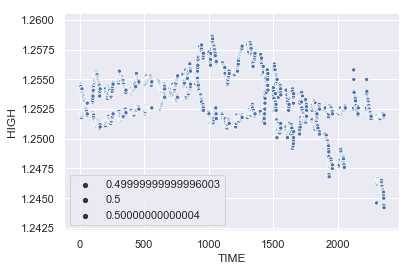

In [37]:
sns.scatterplot(select_date('2018-01-11','2018-01-14')['TIME'], select_date('2018-01-11','2018-01-14')['HIGH'], size=0.5)

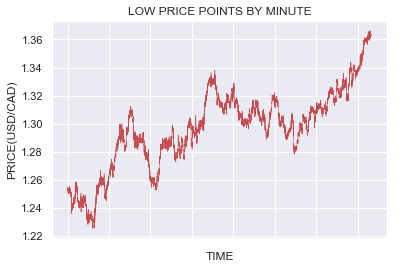

In [38]:
graphs.lows_graph(data)

In [ ]:
'''
import requests

#DELETE API KEY
call = 'http://apilayer.net/api/historical?access_key=b9ab7396a612608ec0a123a4d9c7a567&date=2018-12-30'
def data_import(call):   #can make call more versatile by creating access_key arg, base_url arg, and parameters kwargs
    r = requests.get(call)
    print(type(r))
    data = r.json()
    print(data)
data_import(call)
'''